# Analysis of IMDB Data

### Christopher Zaman

We will analyze a subset of IMDB's actors, genres, movie actors, and movie ratings data. This dataset comes to us from Kaggle (https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset) although we have taken steps to pull this data into a public S3 bucket: 

* s3://cis9760-lecture9-movieanalysis/name.basics.new.tsv ---> Name Basics
* s3://cis9760-lecture9-movieanalysis/title.basic.new.tsv ---> Title Basics
* s3://cis9760-lecture9-movieanalysis/title.principles.new.tsv ---> Title Principles
* s3://cis9760-lecture9-movieanalysis/title.ratings.new.tsv ---> Title Ratings

# Content

**<br />name.basics.tsv.gz – Contains the following information for names:**
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />primaryName (string)– name by which the person is most often credited.
<br />birthYear – in YYYY format.
<br />deathYear – in YYYY format if applicable, else .
<br />primaryProfession (array of strings)– the top-3 professions of the person.
<br />knownForTitles (array of tconsts) – titles the person is known for.
<br/><br/>
**<br />title.basics.tsv.gz - Contains the following information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
<br />primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release.
<br />originalTitle (string) - original title, in the original language.
<br />isAdult (boolean) - 0: non-adult title; 1: adult title.
<br />startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year.
<br />endYear (YYYY) – TV Series end year. for all other title types.
<br />runtimeMinutes – primary runtime of the title, in minutes.
<br />genres (string array) – includes up to three genres associated with the title.
<br/><br/>
**<br />title.principals.tsv – Contains the principal cast/crew for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />ordering (integer) – a number to uniquely identify rows for a given titleId.
<br />nconst (string) - alphanumeric unique identifier of the name/person.
<br />category (string) - the category of job that person was in.
<br />job (string) - the specific job title if applicable, else.
<br />characters (string) - the name of the character played if applicable, else.
<br/><br/>
**<br />title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles:**
<br />tconst (string) - alphanumeric unique identifier of the title.
<br />averageRating – weighted average of all the individual user ratings.
<br />numVotes - number of votes the title has received.

# PART 1 - Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install pandas and matplotlib

In [1]:
%%info

Let's install the necessary packages here

In [2]:
# Install Pandas
sc.install_pypi_package("pandas==1.0.5")

# Install Matplotlib
sc.install_pypi_package("matplotlib==3.1.1")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1715618684596_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
# Confirm packages in the current Spark Context
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -----------
aws-cfn-bootstrap          2.0
beautifulsoup4             4.9.3
boto                       2.49.0
click                      8.1.7
cycler                     0.11.0
docutils                   0.14
jmespath                   1.0.1
joblib                     1.3.2
kiwisolver                 1.4.5
lockfile                   0.11.0
lxml                       4.9.3
matplotlib                 3.1.1
mysqlclient                1.4.2
nltk                       3.8.1
nose                       1.3.4
numpy                      1.20.0
pandas                     1.0.5
pip                        20.2.2
py-dateutil                2.2
pyparsing                  3.1.2
pystache                   0.5.4
python-daemon              2.2.3
python-dateutil            2.9.0.post0
python37-sagemaker-pyspark 1.4.2
pytz                       2023.3
PyYAML                     5.4.1
regex                      2021.11.10
setuptools             

Now, import the installed packages from the previous block below.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

Load all data from S3 into a Spark dataframe object 

In [5]:
# Loading Data
name = spark.read.csv('s3://cis9760-lecture9-movieanalysis/name.basics.new.tsv', sep='\t', header=True)
title = spark.read.csv("s3://cis9760-lecture9-movieanalysis/title.basic.new.tsv", sep='\t', header=True)
principle = spark.read.csv("s3://cis9760-lecture9-movieanalysis/title.principles.new.tsv", sep='\t', header=True)
rating = spark.read.csv("s3://cis9760-lecture9-movieanalysis/title.ratings.new.tsv", sep='\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Name Basics

Display the schema below:

In [6]:
name.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

Display the first 8 rows with the following columns:

* `primaryName`
* `primaryProfession`
* `knownForTitles`

In [7]:
show_top_eight_rows = name.select("primaryName","primaryProfession","knownForTitles")
show_top_eight_rows.show(8,truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+-----------------------------------+---------------------------------------+
|primaryName    |primaryProfession                  |knownForTitles                         |
+---------------+-----------------------------------+---------------------------------------+
|Fred Astaire   |soundtrack,actor,miscellaneous     |tt0027125,tt0050419,tt0053137,tt0072308|
|Lauren Bacall  |actress,soundtrack                 |tt0075213,tt0117057,tt0038355,tt0037382|
|Brigitte Bardot|actress,soundtrack,music_department|tt0049189,tt0054452,tt0056404,tt0057345|
|John Belushi   |actor,soundtrack,writer            |tt0077975,tt0078723,tt0080455,tt0072562|
|Ingmar Bergman |writer,director,actor              |tt0050986,tt0069467,tt0083922,tt0050976|
|Ingrid Bergman |actress,soundtrack,producer        |tt0034583,tt0038787,tt0038109,tt0036855|
|Humphrey Bogart|actor,soundtrack,producer          |tt0043265,tt0042593,tt0037382,tt0034583|
|Marlon Brando  |actor,soundtrack,director          |tt00708

## Title Basics

Display the first 13 rows with the following columns:
    
* `titleType`
* `primaryTitle`
* `genres`

In [8]:
show_top_thirteen_rows_title = title.select("titleType", "primaryTitle", "genres")
show_top_thirteen_rows_title.show(13, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------------------------------------+------------------------+
|titleType|primaryTitle                               |genres                  |
+---------+-------------------------------------------+------------------------+
|short    |Carmencita                                 |Documentary,Short       |
|short    |Le clown et ses chiens                     |Animation,Short         |
|short    |Pauvre Pierrot                             |Animation,Comedy,Romance|
|short    |Un bon bock                                |Animation,Short         |
|short    |Blacksmith Scene                           |Comedy,Short            |
|short    |Chinese Opium Den                          |Short                   |
|short    |Corbett and Courtney Before the Kinetograph|Short,Sport             |
|short    |Edison Kinetoscopic Record of a Sneeze     |Documentary,Short       |
|movie    |Miss Jerry                                 |Romance                 |
|short    |Leaving the Facto

Display the unique title types below:

In [9]:
display_unique_title_types = title.select("titleType").distinct()
display_unique_title_types.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|titleType   |
+------------+
|tvSeries    |
|tvMiniSeries|
|movie       |
|videoGame   |
|tvSpecial   |
|video       |
|tvMovie     |
|tvEpisode   |
|tvShort     |
|short       |
|tvPilot     |
+------------+

Display the schema below:

In [10]:
title.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

Remove the 'originalTitle' from the dataframe and display the schema to verify it.

In [11]:
title = title.drop("originalTitle")
title.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

## Title Principles

Display the schema below:

In [12]:
principle.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

Display the first 25 rows where the "category" column is "actor"

In [13]:
filter_actor_category = principle.filter(principle.category == "actor")
filter_actor_category.show(25, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+--------+---+------------------------------------------------------------------+
|tconst   |ordering|nconst   |category|job|characters                                                        |
+---------+--------+---------+--------+---+------------------------------------------------------------------+
|tt0000005|1       |nm0443482|actor   |\N |["Blacksmith"]                                                    |
|tt0000005|2       |nm0653042|actor   |\N |["Assistant"]                                                     |
|tt0000007|1       |nm0179163|actor   |\N |\N                                                                |
|tt0000007|2       |nm0183947|actor   |\N |\N                                                                |
|tt0000008|1       |nm0653028|actor   |\N |["Sneezing Man"]                                                  |
|tt0000009|2       |nm0183823|actor   |\N |["Mr. Hamilton"]                                                  |
|

## Title Ratings

Display the schema below:

In [14]:
rating.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

Display the first 17 rows in a descending order by the number of votes

In [15]:
from pyspark.sql.functions import col

# Convert numVotes to int
convert_num_votes_to_int = rating.withColumn("numVotes", col("numVotes").cast("int"))

# Sort numVotes in descending order
convert_num_votes_to_int.sort(col('numVotes').desc()).show(17)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt0111161|          9.3| 2868594|
|tt0468569|          9.0| 2850372|
|tt1375666|          8.8| 2531543|
|tt0137523|          8.8| 2303989|
|tt0944947|          9.2| 2265760|
|tt0109830|          8.8| 2239746|
|tt0110912|          8.9| 2203191|
|tt0903747|          9.5| 2114358|
|tt0816692|          8.7| 2073181|
|tt0133093|          8.7| 2038364|
|tt0068646|          9.2| 1998180|
|tt0120737|          8.9| 1993270|
|tt0167260|          9.0| 1965196|
|tt1345836|          8.4| 1815527|
|tt0114369|          8.6| 1784989|
|tt0167261|          8.8| 1771798|
|tt1853728|          8.5| 1681373|
+---------+-------------+--------+
only showing top 17 rows

# Overview of Data

Display the number of rows and columns in each dataFrame object.

In [16]:
# Parallelize name, title, principle, rating:
nameRdd = sc.parallelize(name.columns)
titleRdd = sc.parallelize(title.columns)
principleRdd = sc.parallelize(principle.columns)
ratingRdd = sc.parallelize(rating.columns)

# Name Row and Column Count:
print("Number of columns in Name Basics table: ", nameRdd.count())
print("Number of rows in Name Basics table: ", name.count(), "\n")

# Title Row and Column Count:
print("Number of columns in Title Basics table: ", titleRdd.count())
print("Number of rows in Title Basics table: ", title.count(), "\n")

# Principle Row and Column Count:
print("Number of columns in Principle table: ", principleRdd.count())
print("Number of rows in Principle Basics table: ", principle.count(), "\n")

# Rating Row and Column Count:
print("Number of columns in Rating table: ", ratingRdd.count())
print("Number of rows in Rating table: ", rating.count(), "\n")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Name Basics table:  6
Number of rows in Name Basics table:  13329316 

Number of columns in Title Basics table:  8
Number of rows in Title Basics table:  10613322 

Number of columns in Principle table:  6
Number of rows in Principle Basics table:  60833800 

Number of columns in Rating table:  3
Number of rows in Rating table:  1412275

# PART 2 - Analyzing Movie Genres

Let's now answer this question: how many unique movie genres are represented in this dataset?

Essentially, we have the genres per movie as a list - this is useful to quickly see what each movie might be represented as but it is difficult to easily answer questions such as:

* How many movies are categorized as Comedy, for instance?
* What are the top 20 most popular genres available?

## Association Table

We need to "break out" these genres from the tconst? One common approach to take is to build an association table mapping a single tconst multiple times to each distinct genre.

For instance, given the following:


| tconst   | titleType  |genres |
|----------|------------|-------|
| abcd123  | XXX        |a,b,c  |

We would like to derive something like:

| tconst   |  titleType |genre |
|----------|------------|------|
| abcd123  | XXX        |a     |
| abcd123  | XXX        |b     |
| abcd123  | XXX        |c     |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from the data set

In [67]:
# Association Table
tmp_association_table = title.select("tconst", "titleType", "genres")
tmp_association_table.show(10, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+------------------------+
|tconst   |titleType|genres                  |
+---------+---------+------------------------+
|tt0000001|short    |Documentary,Short       |
|tt0000002|short    |Animation,Short         |
|tt0000003|short    |Animation,Comedy,Romance|
|tt0000004|short    |Animation,Short         |
|tt0000005|short    |Comedy,Short            |
|tt0000006|short    |Short                   |
|tt0000007|short    |Short,Sport             |
|tt0000008|short    |Documentary,Short       |
|tt0000009|movie    |Romance                 |
|tt0000010|short    |Documentary,Short       |
+---------+---------+------------------------+
only showing top 10 rows

In [68]:
# First 30 rows of tmp association table
tmp_association_table = tmp_association_table.withColumn('genres',explode(split('genres',",")))
tmp_association_table.show(30, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|tconst   |titleType|genres     |
+---------+---------+-----------+
|tt0000001|short    |Documentary|
|tt0000001|short    |Short      |
|tt0000002|short    |Animation  |
|tt0000002|short    |Short      |
|tt0000003|short    |Animation  |
|tt0000003|short    |Comedy     |
|tt0000003|short    |Romance    |
|tt0000004|short    |Animation  |
|tt0000004|short    |Short      |
|tt0000005|short    |Comedy     |
|tt0000005|short    |Short      |
|tt0000006|short    |Short      |
|tt0000007|short    |Short      |
|tt0000007|short    |Sport      |
|tt0000008|short    |Documentary|
|tt0000008|short    |Short      |
|tt0000009|movie    |Romance    |
|tt0000010|short    |Documentary|
|tt0000010|short    |Short      |
|tt0000011|short    |Documentary|
|tt0000011|short    |Short      |
|tt0000012|short    |Documentary|
|tt0000012|short    |Short      |
|tt0000013|short    |Documentary|
|tt0000013|short    |Short      |
|tt0000014|short    |Comedy     |
|tt0000014|sho

In [69]:
table_derived = title.select("tconst", "titleType", "primaryTitle", "genres")
# filter for titleType equal to movie
table_derived = table_derived.filter(table_derived.titleType == "movie")

table_derived.show(10, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+------------------------------+--------------------------+
|tconst   |titleType|primaryTitle                  |genres                    |
+---------+---------+------------------------------+--------------------------+
|tt0000009|movie    |Miss Jerry                    |Romance                   |
|tt0000147|movie    |The Corbett-Fitzsimmons Fight |Documentary,News,Sport    |
|tt0000502|movie    |Bohemios                      |\N                        |
|tt0000574|movie    |The Story of the Kelly Gang   |Action,Adventure,Biography|
|tt0000591|movie    |The Prodigal Son              |Drama                     |
|tt0000615|movie    |Robbery Under Arms            |Drama                     |
|tt0000630|movie    |Hamlet                        |Drama                     |
|tt0000675|movie    |Don Quijote                   |Drama                     |
|tt0000679|movie    |The Fairylogue and Radio-Plays|Adventure,Fantasy         |
|tt0000838|movie    |A Cultura do Cacau 

In [18]:
from pyspark.sql.functions import split, col, explode, avg

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Display the first 30 rows of your association table below

In [70]:
association_table = table_derived.withColumn('genres',explode(split('genres',",")))
association_table.show(30, truncate=False)

derived_association_table_df = association_table

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------------------------------------------+-----------+
|tconst   |titleType|primaryTitle                                   |genres     |
+---------+---------+-----------------------------------------------+-----------+
|tt0000009|movie    |Miss Jerry                                     |Romance    |
|tt0000147|movie    |The Corbett-Fitzsimmons Fight                  |Documentary|
|tt0000147|movie    |The Corbett-Fitzsimmons Fight                  |News       |
|tt0000147|movie    |The Corbett-Fitzsimmons Fight                  |Sport      |
|tt0000502|movie    |Bohemios                                       |\N         |
|tt0000574|movie    |The Story of the Kelly Gang                    |Action     |
|tt0000574|movie    |The Story of the Kelly Gang                    |Adventure  |
|tt0000574|movie    |The Story of the Kelly Gang                    |Biography  |
|tt0000591|movie    |The Prodigal Son                               |Drama      |
|tt0000615|movie

## Total Unique Movie Genres

**What is the total number of unique movie genres?**

In [20]:
from pyspark.sql.functions import countDistinct, format_number

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [71]:
total_number_of_unique_movie_genres = association_table.select("genres").distinct().count()
print(total_number_of_unique_movie_genres)

# Using countDistinct
distinct_count = association_table.select(countDistinct("genres"))
distinct_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29
+----------------------+
|count(DISTINCT genres)|
+----------------------+
|                    29|
+----------------------+

**What are the unique movie genres?**

In [72]:
distinct_genres = association_table.select("genres").distinct()
distinct_genres.show(29)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|     genres|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
|      Crime|
|        War|
|  Game-Show|
|      Adult|
|      Music|
|  Biography|
|  Adventure|
|     Horror|
+-----------+

**Oops! Something is off!**

In [73]:
# remove null from the disctinct genres list
nll = '\\N'
remove_null = distinct_genres.filter(col("genres") != nll)
remove_null.show(28)

derived_association_table_filter_null_df = derived_association_table_df.filter(col("genres") != nll)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|     genres|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|  Film-Noir|
|      Short|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
|      Crime|
|        War|
|  Game-Show|
|      Adult|
|      Music|
|  Biography|
|  Adventure|
|     Horror|
+-----------+

## Top Genres by Movies

Now let's find the highest rated genres in this dataset by rolling up genres.

In [74]:
nll = '\\N'
removed_null_df = association_table.filter(association_table.genres != nll)
join_removed_null_df = removed_null_df.join(rating, on="tconst", how="inner")
join_removed_null_df = join_removed_null_df.withColumn("averageRating", col("averageRating").cast("float"))

join_removed_null_df.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+---------+-------------+--------+
|   tconst|titleType|        primaryTitle|   genres|averageRating|numVotes|
+---------+---------+--------------------+---------+-------------+--------+
|tt0000675|    movie|         Don Quijote|    Drama|          4.2|      20|
|tt0000941|    movie|      Locura de amor|    Drama|          4.5|      27|
|tt0001911|    movie|         Nell Gwynne|Biography|          3.6|      25|
|tt0001911|    movie|         Nell Gwynne|    Drama|          3.6|      25|
|tt0001911|    movie|         Nell Gwynne|  History|          3.6|      25|
|tt0002153|    movie|The Great Circus ...|    Drama|          6.0|      81|
|tt0003241|    movie|One Hundred Years...|    Drama|          5.0|      21|
|tt0003241|    movie|One Hundred Years...|  History|          5.0|      21|
|tt0003330|    movie|The Life of Richa...|Biography|          6.2|     123|
|tt0003330|    movie|The Life of Richa...|    Drama|          6.2|     123|
+---------+-

In [75]:
join_removed_null_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- genres: string (nullable = false)
 |-- averageRating: float (nullable = true)
 |-- numVotes: string (nullable = true)

### Average Rating / Genre

In [76]:
average_rating_per_genre = join_removed_null_df.groupBy("genres").agg(avg("averageRating").alias("avg_rating"))
average_rating_per_genre.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|genres     |avg_rating       |
+-----------+-----------------+
|Mystery    |5.847074886309395|
|Musical    |6.187155825431697|
|Action     |5.73206275877058 |
|Sport      |6.622753549016781|
|Talk-Show  |6.857894684139051|
|Romance    |6.102042076246799|
|Thriller   |5.613199077863834|
|Reality-TV |6.701428551333291|
|Family     |6.204969945643073|
|Fantasy    |5.897977381802061|
|History    |6.798132156312619|
|Animation  |6.366616429335746|
|Film-Noir  |6.463253695810208|
|Sci-Fi     |5.352549183035069|
|News       |7.203412463473991|
|Drama      |6.247823270698598|
|Documentary|7.216490032240835|
|Western    |5.840080582491727|
|Comedy     |5.90551925204461 |
|Crime      |5.985035728040876|
+-----------+-----------------+
only showing top 20 rows

In [77]:
# sort average rating per genre by desc
average_rating_per_genre = average_rating_per_genre.orderBy(col("avg_rating").desc())
average_rating_per_genre.show(28)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-----------------+
|     genres|       avg_rating|
+-----------+-----------------+
|Documentary|7.216490032240835|
|       News|7.203412463473991|
|  Biography|6.950988810718765|
|  Game-Show| 6.87999997138977|
|  Talk-Show|6.857894684139051|
|    History|6.798132156312619|
|      Music|6.754639721007496|
| Reality-TV|6.701428551333291|
|      Sport|6.622753549016781|
|  Film-Noir|6.463253695810208|
|        War|6.402568983324664|
|  Animation|6.366616429335746|
|      Drama|6.247823270698598|
|     Family|6.204969945643073|
|    Musical|6.187155825431697|
|    Romance|6.102042076246799|
|      Crime|5.985035728040876|
|     Comedy| 5.90551925204461|
|    Fantasy|5.897977381802061|
|  Adventure| 5.86648599771696|
|    Mystery|5.847074886309395|
|    Western|5.840080582491727|
|     Action| 5.73206275877058|
|   Thriller|5.613199077863834|
|      Adult|5.554367820531472|
|     Sci-Fi|5.352549183035069|
|     Horror|5.002249800832677|
|      Short|              5.0|
+-------

So now, let's unroll our distinct count a bit and display the per average rating value of per genre.

The expected output should be:

| genre | averageRating |
|-------------|------------|
| a     | 8.5         |
| b     | 6.3         |
| c     | 7.2         |

Or something to that effect.

First, let's join our two dataframes (title ratings and title basics) by tconst. Use inner join.

Now, let's aggregate along the averageRating column to get a resultant dataframe that displays average rating per genre.

### Horizontal Bar Chart of Top Genres

With this data available, let us now build a barchart of all genres 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [78]:
# flip the ratings
average_rating_per_genre = average_rating_per_genre.orderBy(col("avg_rating").asc())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [79]:
average_rating_per_genre_pd = average_rating_per_genre.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

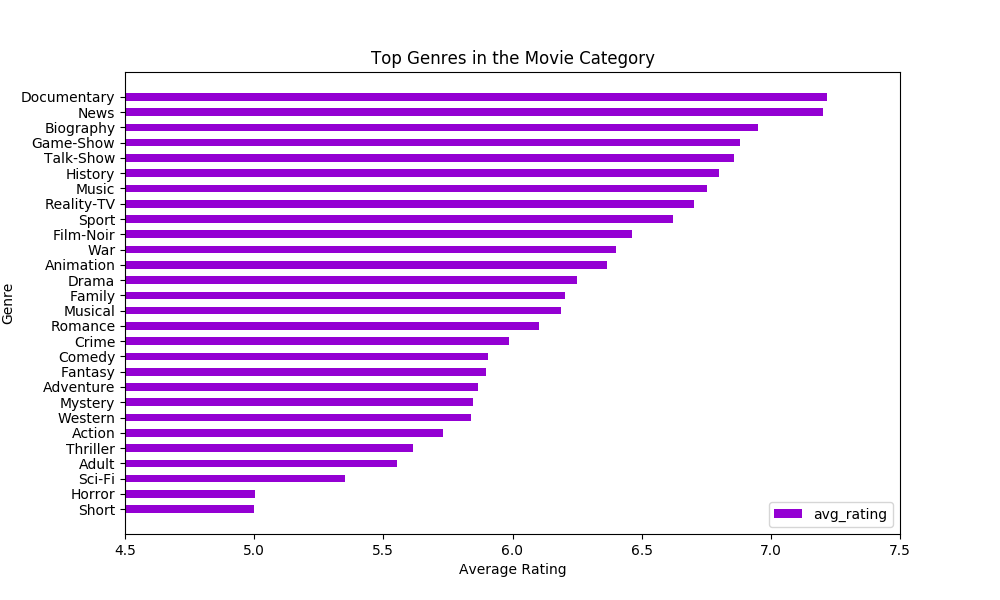

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.barh(average_rating_per_genre_pd['genres'], average_rating_per_genre_pd['avg_rating'], color='#9400d3', height=0.5, label='avg_rating')
plt.xlabel('Average Rating')  
plt.ylabel('Genre')  
plt.legend()
plt.title('Top Genres in the Movie Category')
plt.xlim(4.5, 7.5)

%matplot plt

## PART 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

In [31]:
principle.select("category").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

In [32]:
# use countDistinct
principle.select(countDistinct("category")).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------+
|count(DISTINCT category)|
+------------------------+
|                      12|
+------------------------+

**What are the unique job categories available?**

In [33]:
show_principle_categories_distinct_df = principle.select("category").distinct()
show_principle_categories_distinct_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

## Top Job Categories

Now let's find the top job categories in this dataset by rolling up categories.

### Counts of Titles / Job Category

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [34]:
# Complete
# Counts of each category
count_each_category_principle = principle.groupBy("category").count()

# Sort by count descending
count_each_category_principle = count_each_category_principle.orderBy(col("count").desc())

# Display
count_each_category_principle.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------+
|category           |count   |
+-------------------+--------+
|actor              |13443688|
|self               |10562296|
|actress            |10492210|
|writer             |8495903 |
|director           |7006843 |
|producer           |3944711 |
|cinematographer    |2068164 |
|composer           |2014049 |
|editor             |2012800 |
|archive_footage    |404581  |
|production_designer|383761  |
|archive_sound      |4794    |
+-------------------+--------+

### Bar Chart of Top Job Categories

With this data available, let us now build a barchart of the top 5 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

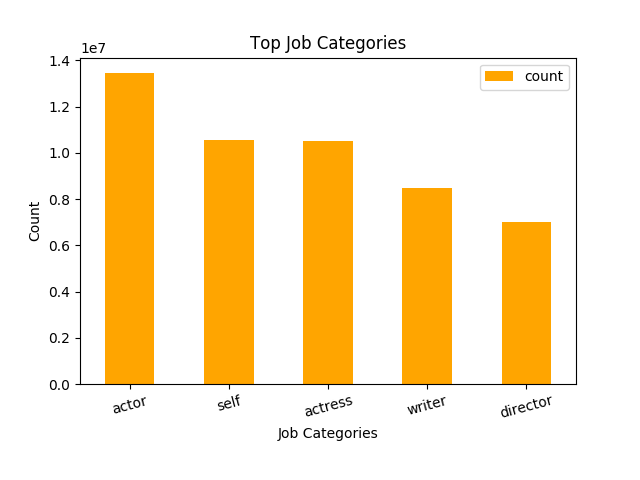

In [62]:
# Top five categories
job_categories = principle.groupBy("category").count().orderBy(col("count").desc()).limit(5)

# The Bar Plot
job_categories_pd = job_categories.toPandas()
plt.figure(figsize=(10, 6))
job_categories_pd.plot.bar(x='category', y='count', title='Top Job Categories', color='orange', rot=15)
plt.subplots_adjust(bottom=0.2)
plt.ylabel('Count')
plt.xlabel('Job Categories')

# Magic
%matplot plt

You do not have to match the color and the figure size but all other aspects of the graph should be matched.

# PART 4 - Answer to the following questions:

1) You will need to join tables to answer the following questions. Not every question will require four tables. 
2) Your code should meet all the requirements asked in the questions.
3) Your code should be generalizable enough for any given arguments.

## 1) Provide ratings for the movies from the Harry Potter franchise.

In [36]:
# Complete
# Join title and rating
title_rating_joined_number_1 = title.join(rating, on="tconst", how="inner")

# Filter for Movies only
title_rating_joined_number_1 = title_rating_joined_number_1.filter(col("titleType") == "movie")

# Filter for Harry Potter only (there are additional "movies" not in the solution output) unsure how to filter by franchise?
title_rating_joined_number_1 = title_rating_joined_number_1.filter(col("primaryTitle").contains("Harry Potter and the"))

# Select primaryTitle and averageRating columns
title_rating_joined_number_1 = title_rating_joined_number_1.select("primaryTitle", "averageRating")

# Rename primaryTitle and averageRating columns to Harry Potter Movies and Avg Rating
title_rating_joined_number_1 = title_rating_joined_number_1.withColumnRenamed("primaryTitle", "Harry Potter Movies").withColumnRenamed("averageRating", "Avg Rating")

# Sort the Avg Rating column by descending
title_rating_joined_number_1 = title_rating_joined_number_1.sort(col("Avg Rating").desc())

# Display the Harry Potter Movies and their avg ratings (one additional movie, different from solution output)
title_rating_joined_number_1.show(8,truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------+----------+
|Harry Potter Movies                         |Avg Rating|
+--------------------------------------------+----------+
|Harry Potter and the Deathly Hallows: Part 2|8.1       |
|Harry Potter and the Prisoner of Azkaban    |7.9       |
|Harry Potter and the Goblet of Fire         |7.7       |
|Harry Potter and the Deathly Hallows: Part 1|7.7       |
|Harry Potter and the Sorcerer's Stone       |7.6       |
|Harry Potter and the Half-Blood Prince      |7.6       |
|Harry Potter and the Order of the Phoenix   |7.5       |
|Harry Potter and the Chamber of Secrets     |7.4       |
+--------------------------------------------+----------+
only showing top 8 rows

## 2) List the films featuring Cillian Murphy as an actor since 2007, including their ratings.

In [37]:
# Complete
# Join name and principle on nconst
num_2_joined = name.join(principle, on="nconst", how="inner")

# Join title on tconst
num_2_joined = num_2_joined.join(title, on="tconst", how="inner")

# Join rating on tconst
num_2_joined = num_2_joined.join(rating, on="tconst", how="inner")

# Find Actors
find_actor = num_2_joined.filter(col("category") == "actor")

# Find Cillian 
find_cillian = find_actor.filter(col("primaryName") == "Cillian Murphy")

# Filter for Films (Movies)
find_cillian = find_cillian.filter(col("titleType") == "movie")

# Filter for years including and after 2007
find_cillian = find_cillian.filter(col("startYear") >= 2007)

# Sort startYear by descending
find_cillian = find_cillian.sort(col("startYear").desc())

# Select columns for result
result_df = find_cillian.select("primaryTitle", "startYear", "averageRating")

# Rename columns
result_df = result_df.withColumnRenamed("primaryTitle", "Movies").withColumnRenamed("startYear", "Year").withColumnRenamed("averageRating", "Avg Rating")

# Display Result
result_df.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------------+----+----------+
|Movies                 |Year|Avg Rating|
+-----------------------+----+----------+
|Small Things Like These|2024|7.2       |
|Oppenheimer            |2023|8.4       |
|Kensuke's Kingdom      |2023|7.1       |
|A Quiet Place Part II  |2020|7.2       |
|Anna                   |2019|6.6       |
|Anthropoid             |2016|7.2       |
|Free Fire              |2016|6.3       |
|In the Heart of the Sea|2015|6.9       |
|Transcendence          |2014|6.2       |
|Aloft                  |2014|5.3       |
|Red Lights             |2012|6.2       |
|Retreat                |2011|5.8       |
|In Time                |2011|6.7       |
|Peacock                |2010|6.2       |
|Perrier's Bounty       |2009|6.3       |
|Waveriders             |2008|6.8       |
|Sunshine               |2007|7.2       |
|Watching the Detectives|2007|6.2       |
+-----------------------+----+----------+

## 3) How many movies has Zendaya featured as an actress in each year?

In [38]:
# Complete
# Join name and principle on nconst
num_3_joined = name.join(principle, on="nconst", how="inner")

# Join title on tconst
num_3_joined = num_3_joined.join(title, on="tconst", how="inner")

# Find zendaya
find_zendaya = num_3_joined.filter(col("primaryName") == "Zendaya")

# Make sure it's the actress Zendaya
find_zendaya = find_zendaya.filter(col("category") == "actress")

# Filter for Movies
find_zendaya = find_zendaya.filter(col("titleType") == "movie")

# Group by year
find_zendaya = find_zendaya.groupBy("startYear").count()

# remove null values from startYear
find_zendaya = find_zendaya.filter(col("startYear") != '\\N')

# Sort by year
find_zendaya = find_zendaya.sort(col("startYear").desc())

# Display result
find_zendaya.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|     2024|    2|
|     2021|    3|
|     2018|    2|
|     2017|    1|
+---------+-----+

## 4) Which movies, released in 2023, have an average rating of 10?

In [39]:
# Complete
# Join title and ratings
number_four_df_join_title_rating = title.join(rating, on="tconst", how="inner")

# Filter for start year 2023
number_four_df_join_title_rating_2023 = number_four_df_join_title_rating.filter(col("startYear") == 2023)

# Filter for Movies only
number_four_df_join_title_rating_2023_movies = number_four_df_join_title_rating_2023.filter(col("titleType") == "movie")

# Filter for Average Rating of 10
number_four_df_join_title_rating_2023_movies_10 = number_four_df_join_title_rating_2023_movies.filter(col("averageRating") == 10.0)

# Select the Movie column
movies_released_in_2023_with_avg_rating_10 = number_four_df_join_title_rating_2023_movies_10.select("primaryTitle")

# Rename the Movie column
movies_released_in_2023_with_avg_rating_10 = movies_released_in_2023_with_avg_rating_10.withColumnRenamed("primaryTitle", "Movies")

# Show the Movie column
movies_released_in_2023_with_avg_rating_10.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|Movies                                        |
+----------------------------------------------+
|Prince Oak Oakleyski Starring Supremacy       |
|Relentless Ride                               |
|Vida de Atriz                                 |
|Freak City Skates the Plaza                   |
|Swapnaloka                                    |
|Eden's Last Chance                            |
|When You Become Me                            |
|Praveena                                      |
|Giuseppe Garibaldi eroe leggendario           |
|Debate Wars                                   |
|Money Man: An Original Documentary            |
|Sisters & The Shrink 4                        |
|A Maiden's Tale                               |
|Le Donne di Pasolini                          |
|Hamida - En afghansk filmstjärna från Alingsås|
|Non Solo Barzellette                          |
|Odyssey                                       |
|La Nueve, Heroes en

## 5) At what age did Audrey Hepburn, known for her role in the movie 'Breakfast at Tiffany's,' pass away?

In [40]:
# Complete

# Explode knownForTitles
name_exploded_number_five = name.withColumn('knownForTitles', explode(split('knownForTitles', ",")))

# Rename knownfortitles to tconst
name_exploded_number_five = name_exploded_number_five.withColumnRenamed('knownForTitles', 'tconst')

# Join name_exploded_number_five with title
name_exploded_number_five_title = name_exploded_number_five.join(title, on="tconst", how="inner")

# Make sure it's the unique Audrey based on criteria in the problem
filter_for_audrey = name_exploded_number_five_title.filter(col("primaryName") == "Audrey Hepburn")
filter_for_audrey_title = filter_for_audrey.filter(col("titleType") == "movie")
filter_for_audrey_title_primary = filter_for_audrey_title.filter(col("primaryTitle") == "Breakfast at Tiffany's")

# Calculate the age by subtracting the birth from death also cast as integer
age_at_death_df = filter_for_audrey_title_primary.withColumn("age_at_death", col("deathYear").cast("int") - col("birthYear").cast("int"))

# Grab the columns and rename them
age_at_death_df = age_at_death_df.select("primaryName","age_at_death")
age_at_death_df = age_at_death_df.withColumnRenamed("primaryName", "Name").withColumnRenamed("age_at_death", "Age at Passing")
age_at_death_df.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------+--------------+
|Name          |Age at Passing|
+--------------+--------------+
|Audrey Hepburn|64            |
+--------------+--------------+

## 6) What is the movie(s) with the highest average rating among those featuring Chris Evans, known for his role in 'Captain America: The First Avenger'?

Write your code in a way that it finds and displays all movies with the highest rating, even if there's more than one. 

In [63]:
# Complete 
# join name and principle on nconst (2 tables)
join_name_principle_number_6_df = name.join(principle, on="nconst", how="inner")

# join title to the joined name_priciple_df on tconst (3 tables)
title_number_6_df = title.join(join_name_principle_number_6_df, on="tconst", how="inner")

# join ratings to the 3 tables (4 tables)
rating_number_6_df = rating.join(title_number_6_df, on="tconst", how="inner")

# Filter for Chris Evans and primaryTitle == "Captain America: The First Avenger"
# find_chris_evans_unique_id = rating_number_6_df.filter((col("primaryTitle") == "Captain America: The First Avenger") & (col("primaryName") == "Chris Evans"))
# find_chris_evans_unique_id_grab_nconst = find_chris_evans_unique_id.select("nconst")
# find_chris_evans_unique_id_grab_nconst.show()
# nconst for chris evans unique id = nm0262635

find_all_chris_evans_movies = rating_number_6_df.filter((col('nconst') == 'nm0262635') & (col('titleType') == 'movie'))

#ranked_chris_evans_movies = find_all_chris_evans_movies.select("primaryTitle", "averageRating").orderBy(col("averageRating").desc())

# Use functions to get the max average rating
from pyspark.sql import functions as F
max_rating = find_all_chris_evans_movies.agg(F.max("averageRating").alias("maxRating")).collect()[0]['maxRating']

# Filter the DataFrame to show only rows with the maximum rating
highest_rated_movies = find_all_chris_evans_movies.filter(F.col("averageRating") == max_rating)

# Show only the movies and Highest avgerageRating Columns
highest_rated_movies = highest_rated_movies.select("primaryTitle", "averageRating")
highest_rated_movies = highest_rated_movies.withColumnRenamed("primaryTitle", "Movies").withColumnRenamed("averageRating", "Highest Avg Rating")
highest_rated_movies.show(truncate=False)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------+------------------+
|Movies                |Highest Avg Rating|
+----------------------+------------------+
|Avengers: Infinity War|8.4               |
|Avengers: Endgame     |8.4               |
+----------------------+------------------+

## 7) Among the movies in which Clint Eastwood, known for 'The Good, the Bad and the Ugly', and Harrison Ford, known for 'Raiders of the Lost Ark', have acted, who has the higher average rating?

Hint: You will need to calculate the average rating across all movies for each actor.

In [64]:
# Complete
# Join name and principles on nconst just to get tconst to join the other tables with
name_principle_number_7_df = name.join(principle, on="nconst", how="inner")

# Join title on tconst now that i have it
title_number_7_df = name_principle_number_7_df.join(title, on="tconst", how="inner")

# Lastly, join ratings on tconst
rating_number_7_df = title_number_7_df.join(rating, on="tconst", how="inner")
#rating_number_7_df.show()

# Get Clint Eastwood nconst
get_clint = rating_number_7_df.filter((col("primaryName") == "Clint Eastwood") & (col("primaryTitle") == "The Good, the Bad and the Ugly"))
get_clint_unique_id = get_clint.select("nconst")
# get_clint_unique_id.show() nconst = nm0000142

# Get Harrison Ford nconst
get_harrison = rating_number_7_df.filter((col("primaryName") == "Harrison Ford") & (col("primaryTitle") == "Raiders of the Lost Ark"))
get_harrison_unique_id = get_harrison.select("nconst")
#get_harrison_unique_id.show() nconst = nm0000148

# filter for harrison movies only
get_harrison_movies = rating_number_7_df.filter((col("titleType") == "movie") & (col("nconst") == "nm0000148") & (col("category") == "actor"))
#get_harrison_movies.show(30)

# filter for Clint movies only
get_clint_movies = rating_number_7_df.filter((col("titleType") == "movie") & (col("nconst") == "nm0000142") & (col("category") == "actor"))
#get_clint_movies.show(30)

# get sum of averageRating column
clint_average_rating_sum = get_clint_movies.agg({"averageRating": "sum"}).collect()[0][0]

# get count of averageRating column
clint_average_rating_count = get_clint_movies.agg({"averageRating": "count"}).collect()[0][0]

# get sum of averageRating column for harrison
harrison_average_rating_sum = get_harrison_movies.agg({"averageRating": "sum"}).collect()[0][0]

# get count of averageRating column for harrison
harrison_average_rating_count = get_harrison_movies.agg({"averageRating": "count"}).collect()[0][0]

# calculate average rating for harrison
harrison_average_rating = harrison_average_rating_sum / harrison_average_rating_count
print(f"The average rating of Harrison Ford is {harrison_average_rating:.2f}")

# calculate average rating for clint
clint_average_rating = clint_average_rating_sum / clint_average_rating_count
print(f"The average rating of Clint Eastwood is {clint_average_rating:.2f}")

if harrison_average_rating > clint_average_rating:
    print("Harrison Ford has the higher average rating.")
elif clint_average_rating > harrison_average_rating:
    print("Clint Eastwood has a higher average rating.")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

The average rating of Harrison Ford is 6.83
The average rating of Clint Eastwood is 6.86
Clint Eastwood has a higher average rating.

## 8) What are the movies in which both Johnny Depp and Helena Bonham Carter have acted together?

In [65]:
# Complete

# Join Name and Principle on nconst
name_principle_number_8_df = name.join(principle, on="nconst", how="inner")

# Join Title on tconst
title_number_8_df = name_principle_number_8_df.join(title, on="tconst", how="inner")

# get_johnny_depp_unique_id = title_number_8_df.filter((col("primaryName") == "Johnny Depp") & (col("category") == "actor"))
# johnny_nconst = get_johnny_depp_unique_id.select("nconst", "primaryName")
# nm0000136

# get_helena_bonham_unique_id = title_number_8_df.filter((col("primaryName") == "Helena Bonham Carter") & (col("category") == "actress") & (col("titleType") == "movie"))
# get_helena_bonham_unique_id = get_helena_bonham_unique_id.select("nconst", "primaryName")
# nm0000307

# Filter and select relevant columns from the original DataFrame, renaming 'primaryTitle'
helena_movies = title_number_8_df.filter((col("nconst") == "nm0000307") & (col("category") == "actress") & (col("titleType") == "movie")).select("tconst", col("primaryTitle").alias("helena_primaryTitle"))
johnny_movies = title_number_8_df.filter((col("nconst") == "nm0000136") & (col("category") == "actor") & (col("titleType") == "movie")).select("tconst", col("primaryTitle").alias("johnny_primaryTitle"))

# Join the DataFrames on 'tconst' while keeping the renamed 'primaryTitle' columns
join_johnny_helena = helena_movies.join(johnny_movies, on="tconst", how="inner")

# Display the resulting DataFrame
#join_johnny_helena.show()

# Select just one column to show
final_movies_df = join_johnny_helena.select(col("helena_primaryTitle").alias("Common Movies"))
final_movies_df.show(truncate=False)



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|Common Movies                                 |
+----------------------------------------------+
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Charlie and the Chocolate Factory             |
|Corpse Bride                                  |
+----------------------------------------------+

## 9) Find the top 5 longest movies directed by Martin Scorsese, known for his work "Gangs of New York".

In [66]:
# Complete

# Join name and principle on nconst
name_principle_number_9_df = name.join(principle, on="nconst", how="inner")

# join title on tconst
title_number_9_df = name_principle_number_9_df.join(title, on="tconst", how="inner")

# Find the nconst of Martin Scorsese, the director of "Gangs of New York"
#scorsese_nconst = title_number_9_df.filter((col("primaryTitle") == "Gangs of New York") & (col("primaryName") == "Martin Scorsese")).select("nconst")
#scorsese_nconst = nm0000217

# Filter for Martin Scorsese movies only
scorsese_movies = title_number_9_df.filter((col("nconst") == "nm0000217") & (col("category") == "director") & (col("titleType") == "movie"))
#scorsese_movies.show()

# Cast runtimeMinutes to integer
scorsese_movies = scorsese_movies.withColumn("runtimeMinutes", col("runtimeMinutes").cast("int"))

# Sort runtime by descending 
top_five = scorsese_movies.orderBy(col("runtimeMinutes").desc())

# Grab the two columns: title and runtime, limit the output to 5
top_five_movies_directed_by_martin = top_five.select("primaryTitle", "runtimeMinutes").limit(5)

# Show the top five titles and runtime minutes
top_five_movies_directed_by_martin.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------------------+--------------+
|primaryTitle                                 |runtimeMinutes|
+---------------------------------------------+--------------+
|The Irishman                                 |209           |
|George Harrison: Living in the Material World|208           |
|Killers of the Flower Moon                   |206           |
|The Wolf of Wall Street                      |180           |
|Casino                                       |178           |
+---------------------------------------------+--------------+